# Photovoltaic power and solar radiation forecasting

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Data exploration

In [2]:
!ls -Alh dataset

total 2481128
-rw-r--r--  1 gerson  staff   493K 26 fév 15:06 datetime_test.npy
-rw-r--r--  1 gerson  staff   4,5M 26 fév 15:06 datetime_trainval.npy
-rw-r--r--  1 gerson  staff   116M 26 fév 15:06 images_test.npy
-rw-r--r--  1 gerson  staff   1,1G 26 fév 15:12 images_trainval.npy
-rw-r--r--  1 gerson  staff    78K 26 fév 15:05 pv_log_test.npy
-rw-r--r--  1 gerson  staff   726K 26 fév 15:05 pv_log_trainval.npy


In [3]:
# datetime data
datetime_trainval= pd.DataFrame(np.load('dataset/datetime_trainval.npy', allow_pickle=True)[()], columns=['d_t'])
datetime_test    = pd.DataFrame(np.load('dataset/datetime_test.npy', allow_pickle=True)[()],columns=['d_t'])

# pv log data
pv_log_trainval  = pd.DataFrame(np.load('dataset/pv_log_trainval.npy', allow_pickle=True)[()],columns=['pv_l'])
pv_log_test      = pd.DataFrame(np.load('dataset/pv_log_test.npy', allow_pickle=True)[()],columns=['pv_l'])

# sky images data
images_trainval  = np.load('dataset/images_trainval.npy', allow_pickle=True)[()]
images_test      = np.load('dataset/images_test.npy', allow_pickle=True)[()]

## 1.1 'datetime' trainval and test

In [4]:
print(f"datetime_trainval.shape: {datetime_trainval.shape}")
print(f"datetime_trainval head : ")
datetime_trainval.head(3)

datetime_trainval.shape: (92975, 1)
datetime_trainval head : 


,d_t
0,2017-03-09 08:00:20
1,2017-03-09 08:01:20
2,2017-03-09 08:02:20


In [5]:
print(f"datetime_test.shape    : {datetime_test.shape}")
print(f"datetime_test head     : ")
datetime_test.head(3)

datetime_test.shape    : (9910, 1)
datetime_test head     : 


,d_t
0,2017-05-20 08:00:00
1,2017-05-20 08:01:00
2,2017-05-20 08:02:00


> #### Note: With datetime data above we note data collection of one minute interval !

## 1.2 'pv_log' trainval and test

In [6]:
print(f"pv_log_trainval.shape: {pv_log_trainval.shape}")
print(f"pv_log_trainval head :")
pv_log_trainval.head(3)

pv_log_trainval.shape: (92975, 1)
pv_log_trainval head :


,pv_l
0,6.205507
1,6.301439
2,6.456909


In [25]:
print("Somme statistics on 'pv_log_trainval' data:")
pv_log_trainval.describe()

Somme statistics on 'pv_log_trainval' data:


,pv_l
count,92975.000000
mean,15.205522
std,7.177062
min,0.000397
25%,9.296960
50%,16.670013
75%,21.374017
max,29.559791


In [26]:
print(f"pv_log_test.shape: {pv_log_test.shape}")
print(f"pv_log_test head :")
pv_log_test.head(3)

pv_log_test.shape: (9910, 1)
pv_log_test head :


,pv_l
0,4.135803
1,4.270825
2,4.415733


In [28]:
print("Somme statistics on 'pv_log_test' data:")
pv_log_test.describe()

Somme statistics on 'pv_log_test' data:


,pv_l
count,9910.000000
mean,14.564921
std,7.474454
min,0.001334
25%,7.893500
50%,16.062818
75%,21.004520
max,29.497691


> #### Note: We note that 'pv_log_trainval' and 'pv_log_trainval' datas have similar statistical distribution !

## 1.3 'images' trainval and test

images_trainval.shape   : (92975, 64, 64, 3)
images_trainval examples:


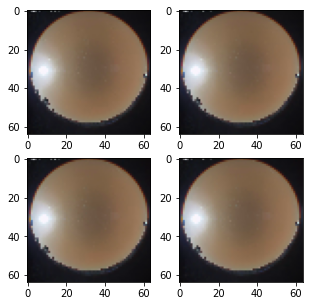

In [8]:
print(f"images_trainval.shape   : {images_trainval.shape}")
print(f"images_trainval examples:")
fig, axes = plt.subplots(2,2, figsize=(5,5))
for i,ax in enumerate(axes.flat):
    ax.imshow(images_trainval[i])

images_test.shape   : (9910, 64, 64, 3)
images_test examples:


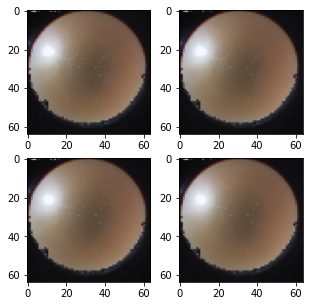

In [9]:
print(f"images_test.shape   : {images_test.shape}")
print(f"images_test examples:")
fig, axes = plt.subplots(2,2, figsize=(5,5))
for i,ax in enumerate(axes.flat):
    ax.imshow(images_test[i])

> ## Some plots

In [42]:
# Getting look of what is hapenning with pv output in 24 hours history (that is 1440 datapoints)
n_dtpoints = 1440
df_24hrs = pd.concat([datetime_trainval[:n_dtpoints],pv_log_trainval[:n_dtpoints]], axis=1)
df_24hrs.pv_l.describe()

count    1440.000000
mean       16.928960
std         6.701064
min         0.224436
25%        12.507370
50%        18.352142
75%        22.197780
max        27.260847
Name: pv_l, dtype: float64

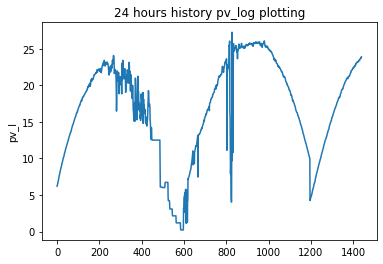

In [48]:
sns.lineplot(data=df_24hrs.pv_l)
plt.title('24 hours history pv_log plotting')
plt.show()

In [49]:
# Getting look of what is hapenning with pv output in 48 ours history (that is 2880 datapoints)
n_dtpoints = 2880
df_48hrs = pd.concat([datetime_trainval[:n_dtpoints],pv_log_trainval[:n_dtpoints]], axis=1)
df_48hrs.pv_l.describe()

count    2880.000000
mean       18.384312
std         6.563474
min         0.224436
25%        13.826858
50%        20.259372
75%        23.749220
max        28.375113
Name: pv_l, dtype: float64

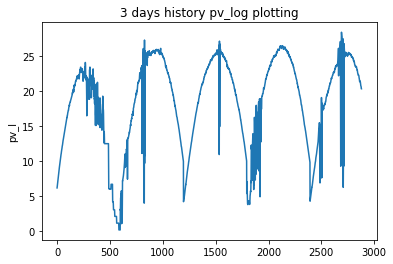

In [47]:
sns.lineplot(data=df_48hrs.pv_l)
plt.title('48 hours history pv_log plotting')
plt.show()

## 2. Forcasting / Nowcasting

## 2.1 Methodology / model architecture #1